In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers
from sklearn.model_selection import train_test_split
import pandas as pd

## Importing the dataset

In [3]:
name = 'benzene_old_dft'
mol = 'Benzene'

In [4]:
data = np.load("datasets/{}.npz".format(name))

NameError: name 'data' is not defined

In [6]:
for i in data.files:
#     print(i, data[i].shape)
    if not data[i].shape:
        print(data[i])

b'qmC6H6'
aims: PBE+TS, light tier 1
b'd'
b'388fb251b16b86d5f038da5f90ca7858'


In [7]:
configs = data['R']

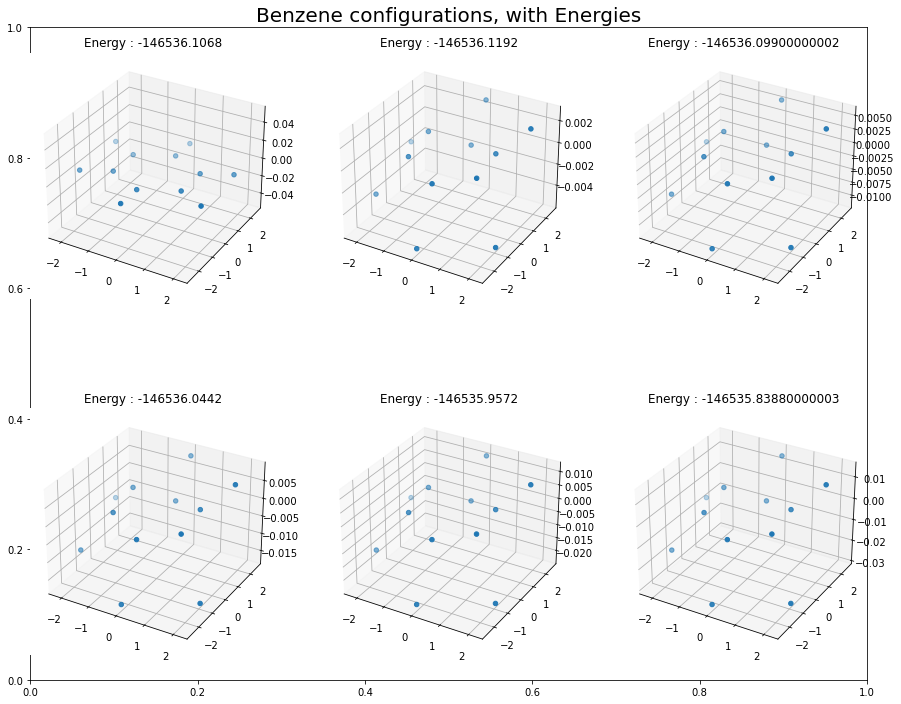

In [8]:
fig = plt.figure(figsize = (15, 12))

plt.title("{} configurations, with Energies".format(mol), fontsize = 20)

for num in range(6):
    ax = fig.add_subplot(2, 3, num + 1, projection = '3d')
    i = configs[num]
    ax.scatter(i[:, 0], i[:, 1], i[:, 2])
    ax.set_title("Energy : {}".format(data['E'][num][0]))
plt.savefig("images/{}_configurations.png".format(mol))
# plt.xticks('off')

### Label statistics

In [9]:
print(data['E'].shape)

(627983, 1)


In [10]:
from matplotlib import colors

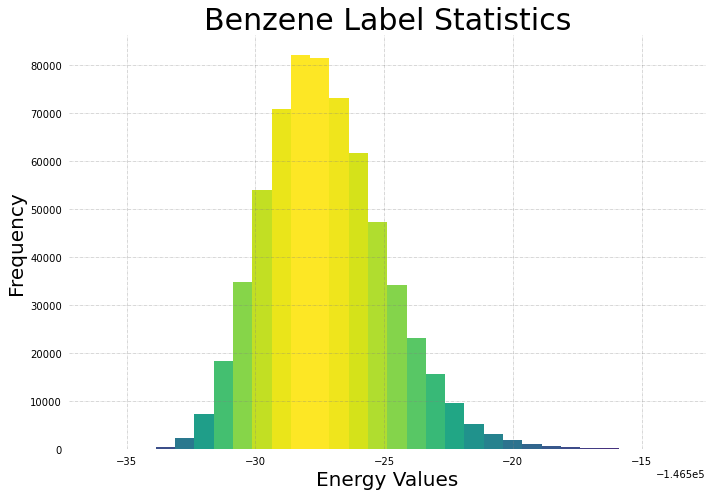

In [11]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7), 
                        tight_layout = True)
for s in ['top', 'bottom', 'left', 'right']: 
    axs.spines[s].set_visible(False) 
    
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 

N, bins, patches = axs.hist(data['E'], bins = 30)
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
axs.xaxis.set_ticks_position('none') 
axs.yaxis.set_ticks_position('none')

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
axs.set_xlabel("Energy Values", fontsize = 20)
axs.set_ylabel("Frequency", fontsize = 20)

axs.set_title("{} Label Statistics".format(mol), fontsize = 30)

plt.savefig("images/{}_label_statistics.png".format(mol))

## Preprocessing the data

In [12]:
print(data['E'].shape, data['R'].shape)

(627983, 1) (627983, 12, 3)


In [13]:
total_size = int(1e5)
data_points = data['R'][:total_size].copy()
data_labels = data['E'][:total_size].copy()

print(data_points.shape, data_labels.shape)

(100000, 12, 3) (100000, 1)


In [14]:
model = keras.Sequential([layers.Flatten(input_shape = (12, 3)), layers.Dense(20, activation = tf.nn.relu), 
                            layers.Dense(10, activation = tf.nn.relu),
                            layers.Dense(1)])
model.build()

In [15]:
print(data_points[1].shape)

(12, 3)


In [16]:
print(model(data_points[:10]))

tf.Tensor(
[[-0.76066077]
 [-0.7611585 ]
 [-0.76166785]
 [-0.7621871 ]
 [-0.76270187]
 [-0.7632241 ]
 [-0.7637433 ]
 [-0.76426756]
 [-0.76478684]
 [-0.76530796]], shape=(10, 1), dtype=float32)


In [17]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(data_points, data_labels, test_size = 0.2)

In [21]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(80000, 12, 3) (80000, 1) (20000, 12, 3) (20000, 1)


In [22]:
%%time
history = model.fit(
    train_data, train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 2min 43s, sys: 13.8 s, total: 2min 57s
Wall time: 2min 13s


In [27]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1061.780396,922.249634,95
96,999.794434,693.591919,96
97,989.074341,907.786987,97
98,941.626038,728.760071,98
99,1006.373535,1582.682129,99


In [36]:
def plot_loss(history):
    print(history.history['loss'])
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Energy Values]')
    plt.legend()
    plt.grid(True)

[15220.6640625, 4826.876953125, 4159.2470703125, 3899.0185546875, 3595.568603515625, 3392.2626953125, 3376.72998046875, 2817.330322265625, 2701.68310546875, 2477.6455078125, 2503.447509765625, 2431.982421875, 2286.977294921875, 2054.853759765625, 2097.439208984375, 2023.606689453125, 1904.1209716796875, 1779.835205078125, 1703.0516357421875, 1707.429931640625, 1567.649169921875, 1661.2647705078125, 1485.481201171875, 1648.40625, 1509.8248291015625, 1617.33740234375, 1514.561279296875, 1532.0233154296875, 1435.927490234375, 1587.03515625, 1398.997802734375, 1443.4437255859375, 1359.691162109375, 1443.6044921875, 1343.324951171875, 1394.6439208984375, 1391.2099609375, 1292.705322265625, 1388.0487060546875, 1311.553955078125, 1341.057373046875, 1234.435546875, 1356.99658203125, 1321.703125, 1272.8114013671875, 1228.059326171875, 1267.0469970703125, 1210.7310791015625, 1267.4566650390625, 1258.397216796875, 1235.758544921875, 1292.25146484375, 1151.693115234375, 1209.713623046875, 1208.771

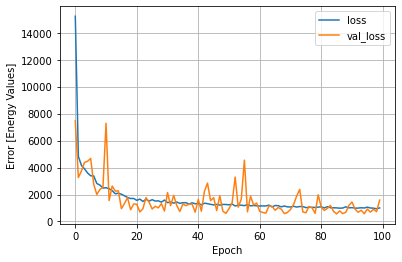

In [37]:
plot_loss(history)

In [43]:
test_prediction = model.predict(test_data)

In [44]:
print(test_prediction.shape, test_labels.shape)

(20000, 1) (20000, 1)


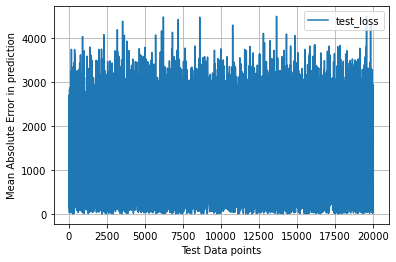

In [48]:
loss = np.abs(test_prediction - test_labels)

plt.plot(loss, label='test_loss')
plt.xlabel('Test Data points')
plt.ylabel('Mean Absolute Error in prediction')
plt.legend()
plt.grid(True)